# CIG-GEM Education Notebook
## A Tutorial on ASPECT
------------------------------

### Description

#### Learning Objectives
Upon completion of this module you should:
- Know what ASPECT is and what it is used for;
- Be able to run ASPECT from the command line;
- Understand the basic layout of parameter files;
- Be able to visualize simulation results with PyVista


### What is ASPECT?
ASPECT stands for the "Advanced Solver for Problems in Earth's ConvecTion." Aspect was originally intended to simulate *Mantle Convection:* the flow of viscous liquid. Now, ASPECT can also be used for tectonic modeling and includes code for elastoviscoplastic models, melting, free surfaces, and more.

#### Examples
Here are some figures created using aspect:
![ASPECT-1](images/aspect-1.png) 
![ASPECT-2](images/aspect-2.png) 
![ASPECT-3](images/aspect-3.png) 
#### ASPECT: Methods
ASPECT uses modern numerical methods like adaptive mesh refinement, linear and nonlinear solvers, higher-order descretizations, and stabilization schemes. ASPECT aims for usability and extensibility with a manual of 570+ pages, 50+ cookbooks and examples, and modular plugin architecture. ASPECT also focuses on parallel scalability. ASPECT was always intended as a community code and is developed in the open with a welcoming attitude to contributions, which are encouraged.

### Using ASPECT
ASPECT is a command line tool. ASPECT is driven by text-based input files which use the .prm extension. The functionality of ASPECT can be extended using "plug-in" codes written in C++. ASPECT outputs text-based "statistics" files along with files that allow visualizations. Using the command line tool, writing input files, and interpreting output files will be demonstrated later in this tutorial.

#### Installation
There are a number of ways to install ASPECT. Please refer to the ASPECT [manual](https://aspect-documentation.readthedocs.io/en/latest/user/install/index.html) for help installing ASPECT. This jupyter notebook environment already has ASPECT installed, so you shouldn't need to install ASPECT to complete this tutorial.

#### Demonstration
ASPECT models are described through parameter files (For example, *tutorial.prm*). Parameter files determine (i) discretization details,
(ii) initial conditions, (iii) boundary conditions, and more.
Before diving in to running aspect, you will need to download the tutorial files by cloning the git repository gassmoeller/aspect-tutorials. The code to do so is below:

In [1]:
!git clone https://github.com/gassmoeller/aspect-tutorials

fatal: destination path 'aspect-tutorials' already exists and is not an empty directory.


After cloning *gassmoeller/aspect-tutorials*, run aspect using the *tutorial.prm* input file:

In [2]:
! aspect /home/geodynamics/jarettbd/aspect-tutorials/2020-tectonics-modeling-tutorial/day1/tutorial.prm

-----------------------------------------------------------------------------
-- This is ASPECT, the Advanced Solver for Problems in Earth's ConvecTion.
--     . version 2.5.0-pre
--     . using deal.II 9.4.0
--     .       with 32 bit indices and vectorization level 1 (128 bits)
--     . using Trilinos 12.18.1
--     . using p4est 2.3.2
--     . running in DEBUG mode
--     . running with 1 MPI process
-----------------------------------------------------------------------------

-----------------------------------------------------------------------------
-- For information on how to cite ASPECT, see:
--   https://aspect.geodynamics.org/citing.html?ver=2.5.0-pre&particles=1&sha=d9396f92f&src=code
-----------------------------------------------------------------------------
Number of active cells: 64 (on 4 levels)
Number of degrees of freedom: 948 (578+81+289)

*** Timestep 0:  t=0 years, dt=0 years
   Solving temperature system... 0 iterations.
   Rebuilding Stokes preconditioner...



### Setting up models in ASPECT
In this section, you will learn how to describe physical situations in ASPECT. ASPECT uses PDE (Partial differential equation) models with finite elements. PDE models consist of several key components: 
- The equations for the model
- Coefficients for the model
- Dependent and independent variables 
- The initial state of the model
- The boundary conditions

In addition to these components, we also need to discretize the model by splitting it into a mesh of finite elements. Finally, we need to say what we want to do with the computed sollution. 

<strong>All of this is described in the input files.<strong>

The following diagrams can help to think about the relationship between the input files and the ASPECT run as a whole.

Here is a diagram describing an ASPECT run:
   
![ASPECT-4](images/aspect-4.png)     
    
Let's break down the Simulator, Model setup, Material mode, and Postprocessors into their components, and mark the relationships between the simulation and the Material model and Adaptive mesh refinement. Doing so, the diagram looks like this: 
    
![ASPECT-5](images/aspect-5.png)  

Finally, this diagram highlights in red the elements of an ASPECT run which are described by the input files:

![ASPECT-6](images/aspect-6.png)  
    

#### Geometry Model
Aspect has many built-in geometry models, e.g., "box" and "spherical shell" models. Box models can be rectangular (2D) or cuboid (3D). The code below demonstrates how to set the geometry model in the input file:

This code defines a 2D box with a width (X extent) of 4.2 x10^6 meters and a depth (Y extent) of 3 x 10^6 meters. ASPECT uses SI units: meter, kg, seconds/years.

#### Initial Temperature
Initial condition models specify the initial temperature. Modeling the initial temperature as a function lets us specify the initial temperature
as a formula, with user defined constants. In this example, we are specifying a sinusoidal perturbation of a linear temperature profile. Here is the equation for temperature:
$ T(x,y) = T_{top} + (T_{bottom} - T_{top}) (1 - \frac{y}{d} -pcos(\frac{k{\pi}x}{L})sin(\frac{{\pi}y}{d}))$
Here is the input file code to implement that temperature equation:

#### Temperature at the Boundary
In this model, the temperature is fixed at 3600K at the bottom of the box and 273K at the top of the box. Depending on the model, left and right temperature options can be similarly specified (so can the back and front temperatures in 3D models). When boundaries are unspecified, they default to no heat flux (i.e., an insulated boundary). Here is the code to specify top and bottom temperature:

#### Velocity at the Boundary
There are a few options for velocity at the boundaries:
- Prescribing the velocity at the boundaries manually,
- Choosing prescribed tractions,
- Choosing "free slip" boundaries

The code below specifies free slip boundaries all around:

#### Discretization
The initial global refinement specifies the mesh “grid spacing”. For this tutorial, the refinement will be set to a specific number (3 or 4 or 5), without "adaptive" mesh refinement for now. Each additional level of refinement increases the number of cells by a factor of 4: 

| REFINE | Rows/Columns | Cells |
|:--------:|:--------:|:--------:|
|  3  |  8x8   |  64   |
|  4   |  16x16  |  256   |
|  5  |  32x32   |  1024  |

Below is the input code specifying the refinement:

#### Postprocessing
The postprocessing section of the input file tells ASPECT how to analyze the simulation data. The code below specifies heat flow and other statistics, visualization, and the addition of particles to help understand the flow. In this case, graphical output is generated every $10^7$ years. 

If you have just cloned the tutorial repository, you will need to edit the postprocessing section of the input file and run aspect again in order to complete the visualization section of this tutorial. Because we will need the visualization files in the .gnuplot format, you will need to add the line:

"set Output format = gnuplot"

inside both the Visualization and Particles subsections. Doing so will tell ASPECT to produce .gnuplot outputs along with .vtu outputs. When you're finished, the postprocessing section of the input file should look like this:

### Playtime: Convection in a 2D Box and the Rayleigh-Nusselt number

Consider a box heated from below and cooled from above, where convection transports heat from the bottom to the top. A reasonable assumption might be that if we had a less viscous fluid, we would have more vigorous convection and so more heat transported convectively. 
However, What matters physically is not actually the viscocity. Consider that:
- A cubic millimeter of honey will not convect for a temperature difference of 100K
- But a cubic kilometer of honey may
Also:
- A cubic kilometer of honey will not convect for a temperature difference of 0.1K
- But it may with a temperature difference of 100K
Thus, the expected degree of convection is described by the "Rayleigh Number:" $ Ra = \frac{{\rho}_{0}g{\alpha}{\Delta}TD^3}{{\eta}k}$

The mathematical statement of the above is therefore:
- Consider a box heated from below and cooled from above
    -> convection transports heat from bottom to top
- Reasonable assumption: Larger Rayleigh number -> More Vigorous convection -> More heat is transported convectively

Conductive heat transported is measured via the "Nusselt Number" (proportional to the surface heat flux). The Rayleigh number has a known empirical relationship with the Nusselt number, which is: $Nu \approx Ra^\frac{1}{3} $
Let's confirm this relationship by playing with one of the parameters (viscocity)!

These should be the model's current parameters: $\rho_{0}=3300, g= 9.81, \alpha=2*10^{-5},{\Delta}T=(3600-273)=3327,D=3*10^{6},k=4.7,c_{p}=1250, \kappa = \frac{k}{\rho_{0}c_{p}} $ 

These values are all found in the *tutorial.prm* input file. In the *subsection Material model* region of the input file, you can also specify the viscocity:

As a learning experience, you can try changing the boundary conditions and geometry of the model. You can also work through the list of ASPECT cookbooks [here](https://aspect-documentation.readthedocs.io/en/latest/user/cookbooks/index.html).

### Visualizing Results
The ASPECT [manual](https://aspect-documentation.readthedocs.io/en/latest/user/run-aspect/visualizing-results/index.html) goes over a number of ways to visualize ASPECT results. Paraview is commonly used to visualize ASPECT results, but we will be using the matplotlib library for this tutorial because it is easy to run matplotlib inside a Jupyter Notebook. The following matplotlib tips for ASPECT are adapted from those found [here](https://github.com/geodynamics/aspect/blob/main/contrib/python/notebooks/read_output_files/example.ipynb) with some minor edits.

We start by importing the packages needed:

In [5]:
%matplotlib inline  
## This allows figures to be plotted "inline". 
## In a normal python script, you use plt.show() to see the figures, 
## or plt.savefig("name.pdf") to save the figures 

import numpy as np  # for mathematical functions and arrays
import matplotlib.pyplot as plt  # for plot
import pandas as pd # for data analysis
from scipy.interpolate import griddata
## We use short names for the libraries we use a lot.

import io 
import os
from subprocess import run

output_dir = "./output/"  

We will also need some functions from the [aspect_data.py](https://github.com/geodynamics/aspect/blob/main/contrib/python/scripts/aspect_data.py) and the [aspect-input.py](https://github.com/geodynamics/aspect/blob/main/contrib/python/scripts/aspect_input.py) scripts. In order to make sure that this notebook is self-contained, we will define those functions within the notebook rather than importing them from the aspect_data.py script:

In [37]:
#aspect-data.py
def read_statistics(fname):
    """ Read the statistics file output by CIG-ASPECT
    
    return a pandas table, where names are taken from the statistics file.
    """
    # header:
    header = []
    header_read = True

    with open(fname) as f:
        while header_read :
            line = f.readline()
            if line[0] == '#':
                idx_start = line.find(":")
                header.append(line[idx_start+2:-1])
            else:
                header_read = False
                
    # data
    values = pd.read_csv(fname, skiprows=len(header), header=None, delim_whitespace=True, names=header)
    return values



def read_gnuplot_visu(fname):
    """ Read a gnuplot file output by ASPECT for visualization 
    
    ! Only tested for single thread, 2D
    """
    # header:
    header = []
    header_read = True

    # Look for the line that starts with "# <", which contains all the names of variables. 
    with open(fname) as f:
        i = 0
        while header_read and i<100:
            line = f.readline()
            i += 1
            if line[0:3] == '# <':
                line_shorten = line[1:]
                idx_start = line_shorten.find("<")
                idx_end = line_shorten.find(">")
                i=0
                while idx_start >= 0 and  i< 100:
                    i+=1
                    header.append(line_shorten[idx_start+1:idx_end])
                    line_shorten = line_shorten[idx_end+1:]
                    idx_start = line_shorten.find("<")
                    idx_end = line_shorten.find(">")       
                header_read = False
    # search the duplicated names to add the suffixes _x _y.They can only be following each others. 
    old_name = [""]
    for i, name in enumerate(header): 
        if name == old_name: 
            header[i-1] = name+"_x"
            header[i] = name+"_y"
        old_name = name
        
    data = pd.read_csv(fname,comment='#', header=None, names=header, sep=" ", index_col=False)
    data.dropna(axis=0, how='any', subset=None, inplace=False) # remove the empty lines
    return data

In [4]:
def get_parameter_value(parameters, name):
    """ Given a dictionary of parameters with a structure as
    the one created by read_parameter_file(), return the value
    of the parameter with the given name. Returns None if the
    parameter is not found.
    """

    if name in parameters:
        return parameters[name]["value"]
    else:
        for entry in parameters:
            if parameters[entry]["type"] == "subsection":
                value = get_parameter_value(parameters[entry]["value"], name)
                if value != None:
                    return value

    return None



def set_parameter_value(parameters, name, value):
    """ Given a dictionary of parameters with a structure as
    the one created by read_parameter_file(), set the value
    of the parameter with the given name to the given value.
    Returns 0 if the parameter was found and set, 1 otherwise.
    """

    if name in parameters:
        parameters[name]["value"] = value
        return 0
    else:
        for entry in parameters:
            if parameters[entry]["type"] == "subsection":
                if set_parameter_value(parameters[entry]["value"], name, value) == 0:
                    return 0

    return 1


def split_parameter_line(line):
    """ Read a 'set parameter' line and extract the name, value, and format. """
    
    equal_index = line.find('=')
    # Determine number of additional spaces left of equal sign.
    # We need to store these separately, because there might be two
    # lines setting the same parameter, but different number of spaces. They
    # should still map to the same parameter.
    alignment_spaces = len(line[:equal_index]) - len(line[:equal_index].rstrip())

    # skip initial word "set" in parameter name
    words_left_of_equal_sign = line[:equal_index].replace("\\\n","").split()
    param_name = words_left_of_equal_sign[1:]
    param_name = ' '.join(param_name)

    # strip spaces at end of value string, keep all inline comments
    param_value = line[equal_index+1:].rstrip()
    # if there is one or more spaces at the start of the string, remove one space.
    # keep additional spaces, because they are part of the formatting.
    # this way we can add one space when writing the file back and keep the formatting
    if param_value.startswith(' ') and len(param_value) > 1:
        param_value = param_value[1:]

    return param_name, param_value, alignment_spaces



def read_value_or_subsection(input_file, parameters):
    """ Read a value or a subsection from a parameter file into a parameter dictionary.
    """

    # Keep track of the comment lines to
    # add them to the next parameter or subsection
    accumulated_comment = ""

    for line in input_file:
        line = line.strip()

        # If line ends with \, read next line and append including \n
        if line != "":
            while line[-1] == "\\":
                line += "\n" + next(input_file).rstrip()

        words = line.replace("\\\n","").split()

        # Attach empty lines if we are inside a comment
        if line == "" or len(words) == 0:
            if accumulated_comment != "":
                accumulated_comment += "\n"

        # Store comments in accumulated_comment
        elif line[0] == "#":
            if accumulated_comment != "":
                accumulated_comment += "\n"
            accumulated_comment += line.replace("\\\n","")

        # If we encounter a 'subsection' line, store the subsection name
        # and recursively call this function to read the subsection
        elif words[0] == "subsection":
            subsection_name = ' '.join(words[1:]).replace("\\","")

            if subsection_name not in parameters:
                parameters[subsection_name] = {"comment": "", "value" : dict({}), "type": "subsection"}

            if parameters[subsection_name]["comment"] != "":
                parameters[subsection_name]["comment"] += "\n"

            parameters[subsection_name]["comment"] += accumulated_comment
            accumulated_comment = ""

            parameters[subsection_name]["value"].update(read_value_or_subsection(input_file, parameters[subsection_name]["value"]))

        # If we encounter a 'set' line, store the parameter name and value
        elif words[0] == 'set':
            name, value, alignment_spaces = split_parameter_line(line)

            parameters[name] = {"comment": accumulated_comment, "value": value, "alignment spaces": alignment_spaces, "type": "parameter"}
            accumulated_comment = ""

        elif words[0] == "include":
            name = ' '.join(words[1:])
            value = ''
            alignment_spaces = 0
            parameters[name] = {"comment": accumulated_comment, "value": value, "alignment spaces": alignment_spaces, "type": "include"}
            accumulated_comment = ""

        elif words[0] == "end":
            # sometimes there are comments at the end of files or subsection. store them in their own parameter
            if accumulated_comment != "":
                parameters["postcomment"] = {"comment": accumulated_comment, "value": "", "alignment spaces": 0, "type": "comment"}
                accumulated_comment = ""

            return parameters

        else:
            raise RuntimeError("Unrecognized first keyword in line: " + line)

    # sometimes there are comments at the end of files or subsection. store them in their own parameter
    if accumulated_comment != "":
        parameters["postcomment"] = {"comment": accumulated_comment, "value": "", "alignment spaces": 0, "type": "comment"}
        accumulated_comment = ""

    return parameters



def read_parameter_file(file):
    """ Read parameter file, and return a dictionary with all values. 
    
    The returned dictionary contains as keys the name of the subsection,
     include statement or parameter, and as value a dictionary with
     the following keys:
    - 'comment': the comment lines before the parameter or subsection
    - 'value': the value of the parameter as a string, or a dictionary
      with the same structure as the one returned by this function
      for a subsection. Empty for an include statement (the content
      of an include statement is its name).
    - 'alignment spaces': the number of spaces between name and equal sign
      in a parameter line. This is used to keep the formatting
      of the parameter file when writing it back.
    - 'type': either 'parameter', 'include', 'subsection', or 'comment'
      depending on the type of the entry.
    """

    parameters = dict({})
    
    with open(file, 'r') as f:
        read_value_or_subsection(f, parameters)
   
    return parameters



def write_comment_if_existent(comment, prepend_spaces, file):
    """ Print the comment lines, take care to use the correct indentation. 
    """
    if comment != "":
        for line in comment.split("\n"):
            if line != "":
                file.write(" " * prepend_spaces)
            file.write(line + "\n")


def write_value_or_subsection(parameters, prepend_spaces, file):
    """ Write a parameters dictionary recursively into a given file.
    prepend_spaces tracks the current indentation level.
    """

    # keep track of whether this is the first entry
    # this is important for some formatting
    first_entry = True

    # Print all parameter/include entries first
    for entry in parameters:
        if parameters[entry]["type"] == "parameter":
            # Add empty line before comments
            if first_entry == False and parameters[entry]["comment"] != "":
                file.write("\n")
            write_comment_if_existent(parameters[entry]["comment"], prepend_spaces, file)

            # Only add a space after equal sign if the value is not empty
            space_if_value = " " if parameters[entry]["value"] != "" else ""
            file.write(" " * prepend_spaces + "set " + entry + " " * parameters[entry]["alignment spaces"] + "=" \
                        + space_if_value + parameters[entry]["value"] + "\n")
            first_entry = False

        elif parameters[entry]["type"] == "include":
            # Add empty line before include
            if first_entry == False:
                file.write("\n")
            write_comment_if_existent(parameters[entry]["comment"], prepend_spaces, file)

            # Write the parameter
            file.write(" " * prepend_spaces + "include " + entry + "\n")
            # Add an empty line after include, except for the end of the file
            if entry != list(parameters)[-1]:
                file.write("\n")

            first_entry = False
    
    # Then print all subsections and end of subsection/file comments
    for entry in parameters:
        if parameters[entry]["type"] == "subsection":
            if first_entry == False:
                file.write("\n")
            write_comment_if_existent(parameters[entry]["comment"], prepend_spaces, file)

            file.write(" " * prepend_spaces + "subsection " + entry + "\n")
            prepend_spaces += 2
            # Recursively write the next subsection level
            write_value_or_subsection(parameters[entry]["value"], prepend_spaces, file)
            prepend_spaces -= 2
            file.write(" " * prepend_spaces + "end\n")
            first_entry = False

        elif parameters[entry]["type"] == "comment":
            if first_entry == False and parameters[entry]["comment"] != "":
                file.write("\n")
            write_comment_if_existent(parameters[entry]["comment"], prepend_spaces, file)
            first_entry = False

    return 0



def write_parameter_file(parameters, file):
    """ Given a dictionary of parameters with a structure as
    the one created by read_parameter_file(), write the dictionary
    to a file.
    """

    prepend_spaces = 0
    with open(file,'w') as f:
        write_value_or_subsection(parameters, prepend_spaces, f)
    return 0

Now, we're ready to start plotting the ASPECT output files. We will begin with file statistics. The file "statistics" regroups all the statistics for every time step. It can be a very long file, so pandas (a package for data analysis) is the best tool to open and read it. The number of columns depends on your run, and is indicated as comments at the beginning of the file. The function read_statistics() will read the comments, extract the names of the columns and then read the file with pd.read_csv().

In [29]:
# we provide the name for the file statistics:
statistics = output_dir+ "statistics"

# we read the file with our function:
data =  read_statistics(statistics)

/var/folders/nv/4y78n8b133ngb27wvzmc0qg40000gn/T/ipykernel_24260/1485422590.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  values = pd.read_csv(fname, skiprows=len(header), header=None, delim_whitespace=True, names=header)


The output of the function is a pandas dataframe, which represents all of the data in a table wherethe columns have human-readable names. We can have a look at the table with data.head()

In [30]:
data.head()

,Time step number,Time (years),Time step size (years),Number of mesh cells,Number of Stokes degrees of freedom,Number of temperature degrees of freedom,Iterations for temperature solver,Iterations for Stokes solver,Velocity iterations in Stokes preconditioner,Schur complement iterations in Stokes preconditioner,...,Average temperature (K),Maximal temperature (K),Average nondimensional temperature (K),"Outward heat flux through boundary with indicator 0 (""left"") (W)","Outward heat flux through boundary with indicator 1 (""right"") (W)","Outward heat flux through boundary with indicator 2 (""bottom"") (W)","Outward heat flux through boundary with indicator 3 (""top"") (W)",Visualization file name,Number of advected particles,Particle file name
0,0,0.000000e+00,0.000000e+00,64,659,289,0,4,6,5,...,1936.50000,3600.0,0.500000,0.0,0.0,-21891.7793,21891.8183,output/solution/solution-00000,1000,output/particles/particles-00000
1,1,4.930733e+09,4.930733e+09,64,659,289,23,9,11,11,...,1936.52377,3600.0,0.500007,0.0,0.0,-22113.9603,22119.8978,output/solution/solution-00001,1000,output/particles/particles-00001
2,2,6.111204e+09,1.180471e+09,64,659,289,14,9,11,11,...,1936.53886,3600.0,0.500012,0.0,0.0,-22765.0957,22780.9524,output/solution/solution-00002,1000,output/particles/particles-00002
3,3,6.716713e+09,6.055089e+08,64,659,289,11,10,12,12,...,1936.55049,3600.0,0.500015,0.0,0.0,-23842.7716,23871.1527,output/solution/solution-00003,1000,output/particles/particles-00003
4,4,7.117295e+09,4.005823e+08,64,659,289,9,10,12,12,...,1936.56062,3600.0,0.500018,0.0,0.0,-25344.5970,25388.3792,output/solution/solution-00004,1000,output/particles/particles-00004


We can then look at the evolution of some of the statistics with time:

<Axes: xlabel='Time (years)'>

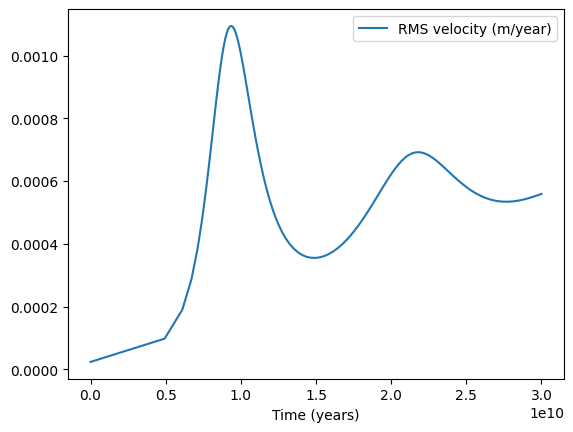

In [31]:
# using the plot function embedded in the panda frame:
data.plot("Time (years)", "RMS velocity (m/year)")

Text(0.5, 0, 'Time (years)')

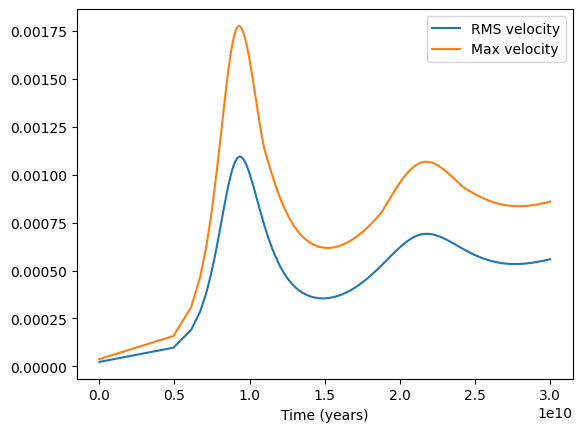

In [32]:
# or using the pyplot functions (allows more flexibility)

fig, ax = plt.subplots()

ax.plot(data["Time (years)"], data["RMS velocity (m/year)"], label="RMS velocity")
ax.plot(data["Time (years)"], data["Max. velocity (m/year)"], label="Max velocity")
ax.legend()
ax.set_xlabel("Time (years)")

The statistics file includes when visualization files have been created. If they have been written as gnuplot files, then we can read them and plot them.

In the example case, the grid is a column of 1 cell width. So the output can be plotted as 1D variable.

In [39]:
# we remove the values from data with NaN in the visualization file name column
data = data.dropna(subset=["Visualization file name"])

# we store the values for the file names and the associated time. 
visu_files = data["Visualization file name"].values
visu_times = data["Time (years)"].values

df = read_gnuplot_visu(visu_files[4]+".0000.gnuplot")
print(df.head())


          x         y  velocity_x  velocity_y             p        T  density  \
0       0.0       0.0    0.000000    0.000000  9.369380e+10  3600.00  3081.74   
1  262500.0       0.0   -0.000122    0.000000  9.370270e+10  3600.00  3081.74   
2  525000.0       0.0   -0.000239    0.000000  9.371160e+10  3600.00  3081.74   
3       0.0  187500.0    0.000000    0.000087  8.800590e+10  3475.51  3089.95   
4  262500.0  187500.0   -0.000120    0.000086  8.801440e+10  3473.27  3090.10   

   thermal_expansivity  specific_heat     viscosity  
0              0.00002           1250  5.104520e+24  
1              0.00002           1250  5.104520e+24  
2              0.00002           1250  5.104520e+24  
3              0.00002           1250  5.104520e+24  
4              0.00002           1250  5.104520e+24  


Now, lets plot the velocity on a structured grid:

(0.0, 1.0)

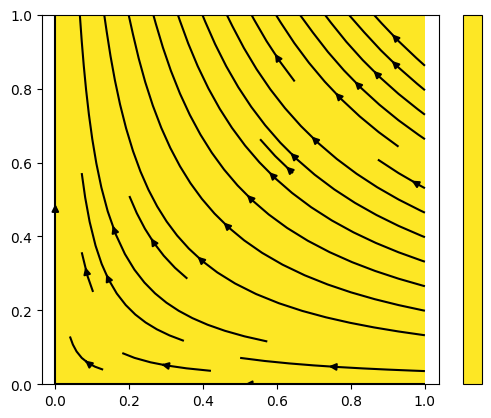

In [48]:
fig, ax = plt.subplots()

# define grid.
xi = np.linspace(0, 1, 100)
yi = np.linspace(0, 1, 100)
xi, yi = np.meshgrid(xi, yi)

# interpolate the values on the grid for the temperature.
Ti = griddata((x, y), t, (xi, yi))
# contour the gridded data, plotting dots at the nonuniform data points.
#CS = plt.contour(xi, yi, Ti, 15, linewidths=0.5, colors='k')
CS = ax.contourf(xi, yi, Ti, 15,
                  vmax=1., vmin=0.)
fig.colorbar(CS, ax=ax, ticks=[0, 0.5, 1])

# grid the velocities
vx, vy = df["velocity_x"].values, df["velocity_y"].values
Vxi = griddata( (x, y), vx, (xi, yi))
Vyi = griddata( (x, y), vy, (xi, yi))
ax.streamplot(xi, yi, Vxi, Vyi, density=[0.5,0.5], color='k')

ax.axis('equal')  # force the x and y axes to have the same scale
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.axis('off') # remove the axes and ticks


### More about ASPECT:
Aspect can run in "debug" or "optimized" mode.


| Mode | Internal Checks? | Compiler Optimizations | Speed|
|:--------:|:--------:|:--------:|:--------:|
|  Debug  |  lots of internal checks to verify correctness of algorithms in deal.II, ASPECT, and user-provided plugins  | no compiler optimizations to make debugging simpler   | slow
|  Optimized  |  most internal checks switched off |  uses all available compiler optimizations  | fast (about 4-10 times faster than slow mode)

By default, ASPECT uses Debug mode.

#### Guidance for Debug vs Optimized mode
*Always* test all new setups, models, and plugins in debug mode. This makes finding bugs much simpler. Execute production runs with more mesh refinement and in optimized mode. *Never* do production runs in debug mode, since this is a waste of CPU time. Remember, 1 CPU hour $\approx$ \$0.10.

#### Running ASPECT in parallel
ASPECT can run in parallel on a single machine, with several ASPECT executables working together at the same time. Run the code below to try this out:

In [4]:
!mpirun -np 2 aspect /home/geodynamics/jarett/aspect-tutorials/2020-tectonics-modeling-tutorial/day1/tutorial.prm

-----------------------------------------------------------------------------
-- This is ASPECT, the Advanced Solver for Problems in Earth's ConvecTion.
--     . version 2.5.0-pre
--     . using deal.II 9.4.0
--     .       with 32 bit indices and vectorization level 1 (128 bits)
--     . using Trilinos 12.18.1
--     . using p4est 2.3.2
--     . running in DEBUG mode
--     . running with 2 MPI processes
-----------------------------------------------------------------------------



----------------------------------------------------
Exception 'ExcMessage (std::string("Could not open file <") + filename + ">.")' on rank 0 on processing: 

--------------------------------------------------------
An error occurred in line <1501> of file </apps/share64/debian10/aspect/aspect-2.5.0pre/build/aspect/source/utilities.cc> in function
    std::__cxx11::string aspect::Utilities::read_and_distribute_file_content(const string&, ompi_communicator_t* const&)
The violated condition was: 
    false

the "-np" tag specifies the number of processes. 
As a general guideline, using more processors is faster if every processesor has at least 30,000 degrees of freedom. In ASPECT, you will find the number of degrees of freedom at the top of log.txt.
If you do have a large problem, use
- as many processors as you have,
– but no more than #DoFs / 30,000
For example,
- tutorial.prm with 3 global refinements has 948 DoFs
- tutorial.prm with 5 global refinements has 13,764 DoFs
Neither of these benefit much from parallization: the cost of communication is larger than the gain due to parallelization.